In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

In [60]:
pandemic_data = pd.read_csv('dataset/transformed_pandemic_data.csv')
pandemic_data.head(10)

,Unnamed: 0,iso_code,location,date,total_cases,total_deaths,stringency_index,population,gdp_per_capita,human_development_index,month,year
0,0,AFG,Afghanistan,2019-12-31,0,0,0.0,38928341,1803.987,0.498,12,2019
1,1,AFG,Afghanistan,2020-01-01,0,0,0.0,38928341,1803.987,0.498,1,2020
2,2,AFG,Afghanistan,2020-01-02,0,0,0.0,38928341,1803.987,0.498,1,2020
3,3,AFG,Afghanistan,2020-01-03,0,0,0.0,38928341,1803.987,0.498,1,2020
4,4,AFG,Afghanistan,2020-01-04,0,0,0.0,38928341,1803.987,0.498,1,2020
5,5,AFG,Afghanistan,2020-01-05,0,0,0.0,38928341,1803.987,0.498,1,2020
6,6,AFG,Afghanistan,2020-01-06,0,0,0.0,38928341,1803.987,0.498,1,2020
7,7,AFG,Afghanistan,2020-01-07,0,0,0.0,38928341,1803.987,0.498,1,2020
8,8,AFG,Afghanistan,2020-01-08,0,0,0.0,38928341,1803.987,0.498,1,2020
9,9,AFG,Afghanistan,2020-01-09,0,0,0.0,38928341,1803.987,0.498,1,2020


In [61]:
pandemic_data.shape

(50418, 12)

In [62]:
# Rename columns
pandemic_data = pandemic_data.rename(columns = {'location':'loc', 'stringency_index': 'SI', 'population': 'pop', 'gdp_per_capita':'GDP', 'human_development_index': 'HDI'})
pandemic_data.columns

Index(['Unnamed: 0', 'iso_code', 'loc', 'date', 'total_cases', 'total_deaths',
       'SI', 'pop', 'GDP', 'HDI', 'month', 'year'],
      dtype='object')

In [63]:
index_names = pandemic_data[(pandemic_data['SI'] == 0.0) & (pandemic_data['total_deaths'] == 0) & (pandemic_data['total_cases'] == 0)].index
pandemic_data.drop(index_names, inplace = True)

In [64]:
# Filter out India's data

india_pandemic_data = pandemic_data.loc[pandemic_data['loc'] == 'India']
india_pandemic_data

,Unnamed: 0,iso_code,loc,date,total_cases,total_deaths,SI,pop,GDP,HDI,month,year
21453,21453,IND,India,2020-01-25,0,0,5.56,1380004385,6426.674,0.64,1,2020
21454,21454,IND,India,2020-01-26,0,0,10.19,1380004385,6426.674,0.64,1,2020
21455,21455,IND,India,2020-01-27,0,0,10.19,1380004385,6426.674,0.64,1,2020
21456,21456,IND,India,2020-01-28,0,0,10.19,1380004385,6426.674,0.64,1,2020
21457,21457,IND,India,2020-01-29,0,0,10.19,1380004385,6426.674,0.64,1,2020
...,...,...,...,...,...,...,...,...,...,...,...,...
21717,21717,IND,India,2020-10-15,7307097,111266,0.00,1380004385,6426.674,0.64,10,2020
21718,21718,IND,India,2020-10-16,7370468,112161,0.00,1380004385,6426.674,0.64,10,2020
21719,21719,IND,India,2020-10-17,7432680,112998,0.00,1380004385,6426.674,0.64,10,2020
21720,21720,IND,India,2020-10-18,7494551,114031,0.00,1380004385,6426.674,0.64,10,2020


### Lets create a scatter plot to figure out the if there is a linear relationship between the two variables

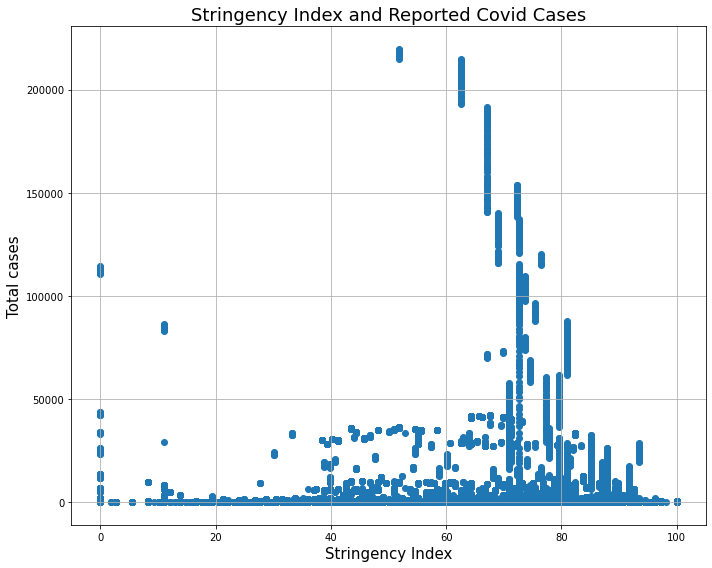

In [65]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 8, forward=True)
ax.scatter(pandemic_data['SI'], pandemic_data['total_deaths'])
ax.set_xlabel('Stringency Index', fontsize=15)
ax.set_ylabel('Total cases', fontsize=15)
ax.set_title('Stringency Index and Reported Covid Cases', fontsize=18)
ax.grid(which='both')
plt.tight_layout()

### Regression variable -
    y is dependant
    x is independant

In [85]:
x = india_pandemic_data['SI']
y = india_pandemic_data['total_cases']
# y2 = india_pandemic_data['total_deaths']

In [86]:
x

21453     5.56
21454    10.19
21455    10.19
21456    10.19
21457    10.19
         ...  
21717     0.00
21718     0.00
21719     0.00
21720     0.00
21721     0.00
Name: SI, Length: 269, dtype: float64

#### Model Validation

In [87]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

model = LinearRegression()
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, shuffle=True)
x_train = x_train.values.reshape(-1, 1)
x_test = x_test.values.reshape(-1, 1)

print(x_train)
print(y_train)

[[ 79.63]
 [ 79.63]
 [ 76.85]
 [ 74.07]
 [ 81.02]
 [ 96.3 ]
 [100.  ]
 [100.  ]
 [ 79.63]
 [ 26.85]
 [ 79.63]
 [ 76.39]
 [ 81.02]
 [ 81.94]
 [ 75.46]
 [ 77.78]
 [ 75.46]
 [ 81.02]
 [ 77.78]
 [ 81.02]
 [ 76.39]
 [ 79.63]
 [ 75.46]
 [ 81.02]
 [ 79.63]
 [ 10.19]
 [ 79.63]
 [ 81.02]
 [ 77.78]
 [ 26.85]
 [ 79.63]
 [ 96.3 ]
 [ 76.39]
 [ 81.94]
 [ 70.83]
 [ 74.07]
 [ 81.02]
 [  0.  ]
 [ 10.19]
 [ 76.39]
 [ 81.94]
 [100.  ]
 [ 79.17]
 [ 79.63]
 [ 76.85]
 [ 76.85]
 [ 77.78]
 [ 74.07]
 [ 79.63]
 [ 96.3 ]
 [ 59.72]
 [ 10.19]
 [ 10.19]
 [ 86.57]
 [ 10.19]
 [ 96.3 ]
 [100.  ]
 [ 81.02]
 [ 81.02]
 [ 79.63]
 [ 79.63]
 [ 79.63]
 [ 10.19]
 [100.  ]
 [ 75.46]
 [  5.56]
 [ 76.39]
 [100.  ]
 [ 10.19]
 [ 10.19]
 [ 81.94]
 [ 73.61]
 [ 79.63]
 [ 10.19]
 [ 74.07]
 [ 26.85]
 [ 81.02]
 [ 81.02]
 [ 76.39]
 [100.  ]
 [ 81.02]
 [ 73.61]
 [ 76.85]
 [ 10.19]
 [ 79.63]
 [ 10.19]
 [ 81.94]
 [ 76.85]
 [100.  ]
 [ 77.78]
 [ 73.61]
 [ 10.19]
 [ 79.63]
 [ 77.78]
 [ 81.02]
 [ 79.17]
 [ 76.39]
 [ 77.78]
 [ 10.19]
 [ 81.02]


In [88]:
model.fit(x_train, y_train)

LinearRegression()

In [89]:
model.coef_

array([4909.01900306])

In [90]:
model.score(x_train, y_train)

0.00439358247961652

Fitting the dataset into Linear Regression Model

In [91]:
from sklearn.linear_model import LinearRegression

regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [92]:
# calculated co-efficients
regressor.coef_

array([4909.01900306])

In [93]:
# predicting
y_pred= regressor.predict(x_test) 
y_pred

array([1659093.30680742, 1529544.29531671, 1559096.58971512,
       1550014.90455946, 1640929.93649611, 1531802.44405811,
       1659093.30680742, 1543191.36814521, 1550014.90455946,
       1218214.31014273, 1640929.93649611, 1299998.56673369,
       1556838.44097371, 1593165.18159635, 1565920.12612937,
       1559096.58971512, 1529544.29531671, 1543191.36814521,
       1659093.30680742, 1559096.58971512, 1659093.30680742,
       1218214.31014273, 1659093.30680742, 1659093.30680742,
       1218214.31014273, 1559096.58971512, 1559096.58971512,
       1538625.98047237, 1565920.12612937, 1218214.31014273,
       1559096.58971512, 1659093.30680742, 1543191.36814521,
       1538625.98047237, 1556838.44097371, 1565920.12612937,
       1168191.40650157, 1640929.93649611, 1538625.98047237,
       1529544.29531671, 1556838.44097371, 1559096.58971512,
       1659093.30680742, 1218214.31014273, 1218214.31014273,
       1659093.30680742, 1640929.93649611, 1550014.90455946,
       1556838.44097371,

In [94]:
print('Train Score: ', regressor.score(x_train, y_train))  
print('Test Score: ', regressor.score(x_test, y_test))

Train Score:  0.00439358247961652
Test Score:  -0.00925994652657236


In [95]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test,y_pred)

5289112028628.67

In [96]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import mutual_info_regression

# Feature Selection using correlation

In [97]:
# feature selection
f_selector = SelectKBest(score_func=f_regression, k='all')

In [98]:
# learn relationship from training data
f_selector.fit(x_train, y_train)

SelectKBest(k='all', score_func=<function f_regression at 0x1239d9550>)

In [99]:
# transform train input data
x_train_fs = f_selector.transform(x_train)
# transform test input data
x_test_fs = f_selector.transform(x_test)

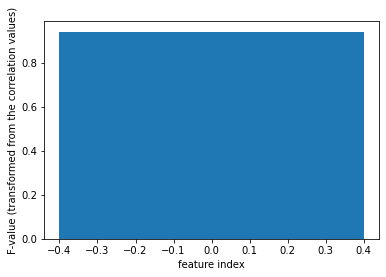

In [100]:
# Plot the scores for the features
plt.bar([i for i in range(len(f_selector.scores_))], f_selector.scores_)
plt.xlabel("feature index")
plt.ylabel("F-value (transformed from the correlation values)")
plt.show()